In [1]:
import xarray as xr
import numpy as np

import sys
sys.path.append('..')
from wxdata.reanalysis import cfsr_6h_apply

In [2]:
def lat_avg_h5_hgt_anom(ds_url, min_lat, max_lat):
    ds = xr.open_dataset(ds_url)
    lat_band_h5 = ds['Geopotential_height_anomaly_isobaric'].sel(lat=slice(max_lat, min_lat), isobaric2=50000)
    return lat_band_h5.mean(dim='lat')

In [3]:
from functools import partial

may03anoms = cfsr_6h_apply('pgb', '2003-04-20 12:00', '2003-05-16 12:00', 
                      apply=partial(lat_avg_h5_hgt_anom, min_lat=40, max_lat=60),
                      timestep='12 hr')

In [4]:
ghgt_anom = xr.concat(may03anoms, dim='time')

In [5]:
ghgt_anom

<xarray.DataArray 'Geopotential_height_anomaly_isobaric' (time: 52, lon: 720)>
array([[-67.44191 , -64.891182, -62.250698, ..., -72.987282, -71.55117 ,
        -69.596054],
       [-33.693413, -28.619761, -23.920246, ..., -50.01878 , -44.413898,
        -38.91732 ],
       [  3.688046,   9.753417,  15.383658, ..., -16.01634 ,  -9.193414,
         -2.557805],
       ..., 
       [-24.808044, -29.171949, -33.386581, ..., -10.912444, -15.497806,
        -20.158287],
       [-10.997563, -14.581949, -18.34    , ...,  -1.02878 ,  -4.062929,
         -7.407315],
       [-16.737562, -18.263412, -20.005852, ..., -13.739512, -14.345364,
        -15.302923]], dtype=float32)
Coordinates:
  * lon        (lon) float32 0.0 0.5 1.0 1.5 2.0 2.5 3.0 3.5 4.0 4.5 5.0 5.5 ...
    isobaric2  float32 50000.0
    reftime    (time) datetime64[ns] 2003-04-20T12:00:00 2003-04-21 ...
  * time       (time) datetime64[ns] 2003-04-20T12:00:00 2003-04-21 ...

Text(0.5,0.98,'500mb Geopotential Height Anomalies averaged between 40°N-60°N, April-May 2003')

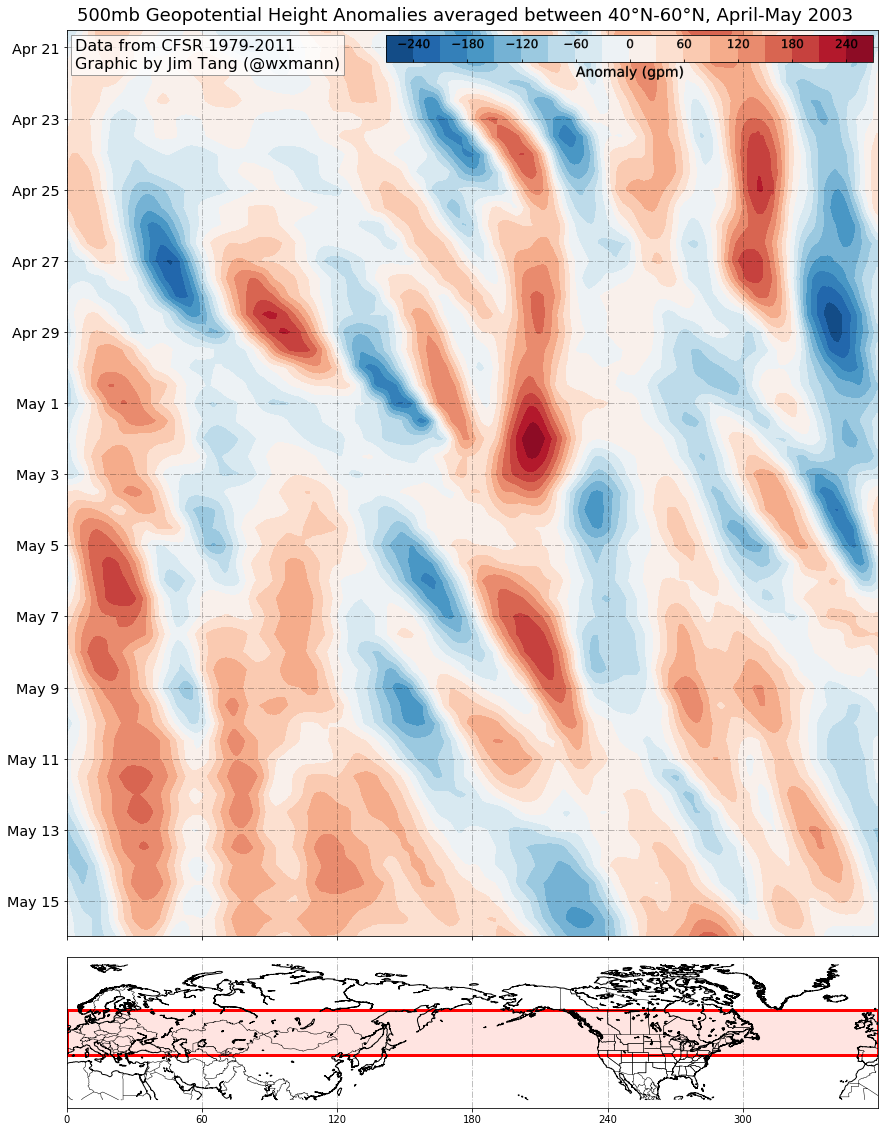

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

from wxdata.plotting import top_left_textbox, draw_latlon_box, inset_colorbar, hovmoller_with_map

fig, (ax1, ax2), mappable, basemap = hovmoller_with_map(ghgt_anom, map_bbox=(0, 360, 20, 80))
fig.subplots_adjust(top=0.96)

top_left_textbox(ax1, 'Data from CFSR 1979-2011\nGraphic by Jim Tang (@wxmann)')
inset_colorbar(mappable, ax1, title='Anomaly (gpm)')
draw_latlon_box(basemap, (0, 360, 40, 60), facecolor='mistyrose', edgecolor='red', linewidth=3)

plt.suptitle('500mb Geopotential Height Anomalies averaged between 40°N-60°N, April-May 2003', 
             fontsize=18)